# 3D plots from records (IAT fixed, ST changing)

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import math
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

In [2]:
#IAT fixed, ST changing
df = pd.read_csv('DetailsH2_H2_1_fixedmean_CVa.csv')
df = df.sort_values(by='mu_kurt')


filtered_df_121 = df[(df["coeffST_sq"] == 1.21) & (df["lam_kurt"] <= 1000) & (df["mu_kurt"] <= 1000)]

lam_kurt_121 = filtered_df_121["lam_kurt"]
mu_kurt_121 = filtered_df_121["mu_kurt"]
RT_121 = filtered_df_121["Response time"]

print(filtered_df_121.head())

filtered_df_4 = df[(df["coeffST_sq"] == 4) & (df["lam_kurt"] <= 1000) & (df["mu_kurt"] <= 1000)]

lam_kurt_4 = filtered_df_4["lam_kurt"]
mu_kurt_4 = filtered_df_4["mu_kurt"]
RT_4 = filtered_df_4["Response time"]
print(filtered_df_4.head())

filtered_df_25 = df[(df["coeffST_sq"] == 25) & (df["lam_kurt"] <= 1000) & (df["mu_kurt"] <= 1000)]

lam_kurt_25 = filtered_df_25["lam_kurt"]
mu_kurt_25 = filtered_df_25["mu_kurt"]
RT_25 = filtered_df_25["Response time"]
print(filtered_df_25.head())

filtered_df_64 = df[(df["coeffST_sq"] == 64) & (df["lam_kurt"] <= 1000) & (df["mu_kurt"] <= 1000)]

lam_kurt_64 = filtered_df_64["lam_kurt"]
mu_kurt_64 = filtered_df_64["mu_kurt"]
RT_64 = filtered_df_64["Response time"]
print(filtered_df_64.head())

      coeffIAT_sq  coeffST_sq    lam_kurt   mu_kurt  Response time
1050           16        1.21   50.008742  9.353320      85.857027
1924           16        1.21   66.312886  9.354166      84.575611
2547           16        1.21   56.767021  9.354210      85.301201
1203           16        1.21  284.789476  9.355539      74.597882
1418           16        1.21  107.549883  9.356524      81.964316
      coeffIAT_sq  coeffST_sq    lam_kurt    mu_kurt  Response time
3534           16         4.0  120.407135  12.768510      94.547252
4501           16         4.0   60.426667  12.786404      97.729614
3612           16         4.0  105.662594  12.792133      95.226950
4651           16         4.0   52.080271  12.799736      98.295932
5380           16         4.0   69.738537  12.800689      97.145525
      coeffIAT_sq  coeffST_sq    lam_kurt    mu_kurt  Response time
8460           16        25.0  103.332624  75.171021     191.590674
7657           16        25.0  162.680401  75.180147  

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


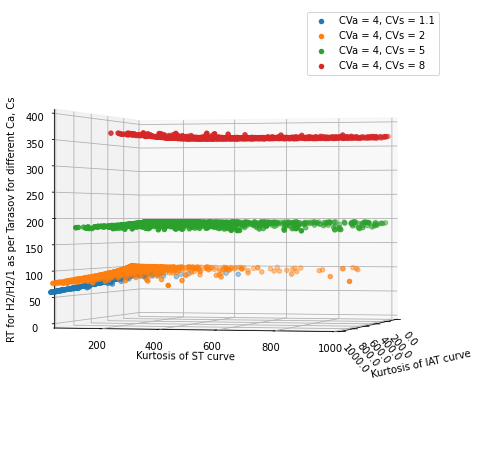

In [4]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot( projection='3d')

ax1.scatter3D(lam_kurt_121, mu_kurt_121, RT_121, label = 'CVa = 4, CVs = 1.1')
ax1.scatter3D(lam_kurt_4, mu_kurt_4, RT_4, label = 'CVa = 4, CVs = 2')
ax1.scatter3D(lam_kurt_25, mu_kurt_25, RT_25, label = 'CVa = 4, CVs = 5')
ax1.scatter3D(lam_kurt_64, mu_kurt_64, RT_64, label = 'CVa = 4, CVs = 8')

ax1.set_xlim(0, 1000)
ax1.set_ylim(50,1000)
ax1.set_zlim(0,400)
ax1.view_init(elev=0, azim=15)


ax1.set_xlabel('Kurtosis of IAT curve', labelpad = 20)
ax1.set_ylabel('Kurtosis of ST curve')
ax1.set_zlabel('RT for H2/H2/1 as per Tarasov for different Ca, Cs')
ax1.set_xticklabels(ax1.get_xticks(), rotation = -50)

'''
for tick in ax1.get_xticklabels():
    tick.set_rotation(60)
    tick.set_horizontalalignment('right')

'''
plt.legend()
plt.savefig("DetailsH2_H2_1_fixedmean_CVa(constantIATparams)3D.pdf", dpi = 100)
plt.show()

# 3D plots from records (ST fixed, IAT changing)


In [5]:
#ST fixed, IAT changing
df = pd.read_csv('DetailsH2_H2_1_fixedmean_CVs.csv')
df = df.sort_values(by='lam_kurt')


filtered_df_121 = df[(df["coeffIAT_sq"] == 1.21) & (df["lam_kurt"] <= 1000) & (df["mu_kurt"] <= 1000) ]

lam_kurt_121 = filtered_df_121["lam_kurt"]
mu_kurt_121 = filtered_df_121["mu_kurt"]
RT_121 = filtered_df_121["Response time"]

print(filtered_df_121.head())

filtered_df_4 = df[(df["coeffIAT_sq"] == 4) & (df["lam_kurt"] <= 1000) & (df["mu_kurt"] <= 1000) ]

lam_kurt_4 = filtered_df_4["lam_kurt"]
mu_kurt_4 = filtered_df_4["mu_kurt"]
RT_4 = filtered_df_4["Response time"]
print(filtered_df_4.head())

filtered_df_25 = df[(df["coeffIAT_sq"] == 25) & (df["lam_kurt"] <= 1000) & (df["mu_kurt"] <= 1000)]

lam_kurt_25 = filtered_df_25["lam_kurt"]
mu_kurt_25 = filtered_df_25["mu_kurt"]
RT_25 = filtered_df_25["Response time"]
print(filtered_df_25.head())

filtered_df_64 = df[(df["coeffIAT_sq"] == 64) & (df["lam_kurt"] <= 1000) & (df["mu_kurt"] <= 1000)]

lam_kurt_64 = filtered_df_64["lam_kurt"]
mu_kurt_64 = filtered_df_64["mu_kurt"]
RT_64 = filtered_df_64["Response time"]
print(filtered_df_64.head())

      coeffIAT_sq  coeffST_sq  lam_kurt     mu_kurt  Response time
2384         1.21          16  6.119974  321.150377      78.627855
73           1.21          16  6.124398   65.674273      78.627659
1902         1.21          16  6.127095   78.149954      78.627521
2515         1.21          16  6.133703   56.466282      78.627295
940          1.21          16  6.136282  320.646499      78.627054
      coeffIAT_sq  coeffST_sq   lam_kurt     mu_kurt  Response time
5014          4.0          16  12.752149   59.034477      92.563993
4777          4.0          16  12.752240   78.891230      92.563986
5439          4.0          16  12.774078  300.013934      92.562434
3061          4.0          16  12.778972   81.955236      92.562090
5019          4.0          16  12.785326   70.641200      92.561643
      coeffIAT_sq  coeffST_sq   lam_kurt     mu_kurt  Response time
7959         25.0          16  75.165356   73.987502     197.661297
6819         25.0          16  75.191564  103.689286  

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


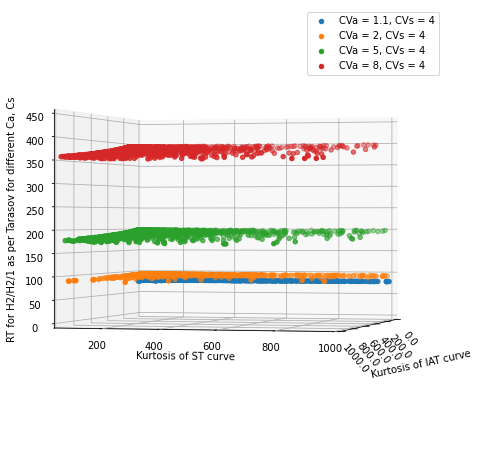

In [6]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot( projection='3d')

ax1.scatter3D(lam_kurt_121, mu_kurt_121, RT_121, label = 'CVa = 1.1, CVs = 4')
ax1.scatter3D(lam_kurt_4, mu_kurt_4, RT_4, label = 'CVa = 2, CVs = 4')
ax1.scatter3D(lam_kurt_25, mu_kurt_25, RT_25, label = 'CVa = 5, CVs = 4')
ax1.scatter3D(lam_kurt_64, mu_kurt_64, RT_64, label = 'CVa = 8, CVs = 4')

ax1.set_xlim(0, 1000)
ax1.set_ylim(50,1000)
ax1.set_zlim(0,450)
ax1.view_init(elev=0, azim=15)


ax1.set_xlabel('Kurtosis of IAT curve', labelpad = 20)
ax1.set_ylabel('Kurtosis of ST curve')
ax1.set_zlabel('RT for H2/H2/1 as per Tarasov for different Ca, Cs')
ax1.set_xticklabels(ax1.get_xticks(), rotation = -50)

'''
for tick in ax1.get_xticklabels():
    tick.set_rotation(60)
    tick.set_horizontalalignment('right')
'''
plt.tight_layout()
plt.legend()
plt.savefig("DetailsH2_H2_1_fixedmean_CVs(constantSTparams)3D.pdf", dpi = 100)
plt.show()